In [8]:
# importando bibliotecas uteis em python:
import numpy as np
from random import uniform
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from scipy import signal
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import networkx as nx
import math
import jgraph as ig

In [9]:
# importando nossas funcoes:
from modules.sphere import gz2D,volfont,gx2D
from modules.distances import l1dist,l2dist

### Script para simular um perfil sintético gravimétrico. A fonte enterrada é uma esfera (fonte pontual) localizada nas coordenadas cartesianas (xc, zc) definidas pelo usuário.

### A equação que computa a componente vertical (z) da atração gravitacional produzida por uma fonte pontual é:
# $g_z = -G\frac{m (z-zc)}{((x-xc)^2 + (z-zc)^2)^{3/2}}$


In [10]:
# definicao das coordenadas do perfil sintetico:
def posgrav(xmin,xmax,n):
    #vetor de coordenadas das diferentes posicoes do gravimetro
    x = np.linspace(xmin, xmax, n, endpoint= True ) # coordenadas x do perfil
    return x

# posicoes sinteticas de observacao:
x = posgrav(-500.0,500.0,100)
#z = -10.0 + x*0.0 # cota fixa de altura
z = -300.0*signal.gaussian(100, std=15)

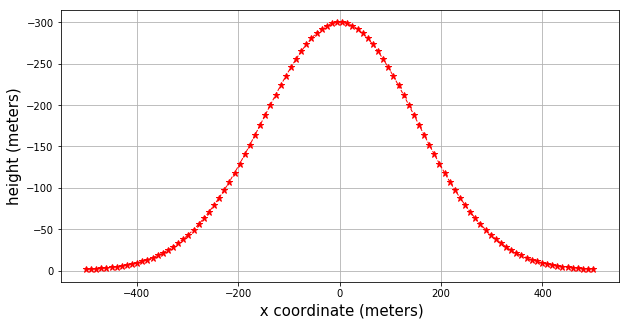

In [11]:
#----------- plot the observation positions: ---------------------#
plt.figure(figsize=(10,5))
plt.gca().invert_yaxis()
plt.plot(x,z, color='red', marker='*', linestyle='dashed',
        linewidth=1, markersize=7)
plt.xlabel(' x coordinate (meters)',fontsize=15 )
plt.ylabel('height (meters)', fontsize=15)
#plt.ylim(-9.0, -11.0)
#plt.xlim(-70.0, +70.0)
plt.grid()
plt.show()

In [ ]:
# Implementacao antiga do Sr. Edson usando a funcao volfont:
raio = volfont(10,2000)[0] # metros
rho = volfont(10,2000)[1] #kg/m3
V = volfont(10,2000)[2] # m3
massa = volfont(10,2000)[3] # kg

### <center> Sorteio dos parametros referentes aos pontos de massa:<center>

In [12]:
npoints = 20 # numero de fontes pontuais utilizadas
sphere = []
for i in range(npoints):
    xc = uniform( -400.0, 400.0  ) #min(x), max(x) )
    zc = uniform( 100.0, 700.0 )
    mass = uniform( 1.0e9, 1.0e10 )
    sphere.append([xc, zc, mass])
    

In [13]:
#--- Guardando as coordenadas e a massa para graficos:
xs = np.zeros(npoints)
zs = np.zeros(npoints)
ms = np.zeros(npoints)
ps1 = (0,0)
ps = []
# ----- Calculo do gz das fontes pontuais
gz = 0
for i,j in enumerate(sphere):
   # print i,j
    xs[i] = j[0]
    zs[i] = j[1]
    ms[i] = j[2]
    ps1 = (xs[i],zs[i])
    ps.append(ps1)
    gz += gz2D(x,z,sphere[i])

In [14]:
# ----- Calculo do gx das fontes pontuais
gx = 0
for i,j in enumerate(sphere):
    gx += gx2D(x,z,sphere[i])

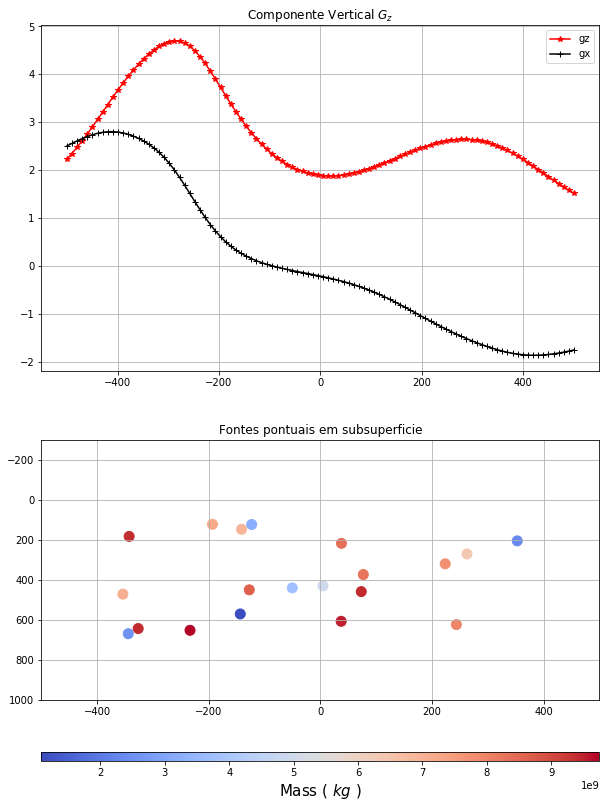

In [15]:
### plot data and the model #####
plt.figure(figsize=(10,14) )
plt.subplot(211)
plt.plot(x,gz,'*-r', label='gz')
plt.plot(x,gx,'+-k', label='gx')
plt.legend()
plt.grid()
plt.title('Componente Vertical $G_z$')

###--------##########################
plt.subplot(212)
p1 = plt.scatter(xs, zs, s=100.0, c=ms, cmap='coolwarm')
cbar = plt.colorbar(p1, aspect = 60, fraction = 0.1, orientation="horizontal")
cbar.set_label('Mass ( $ kg $ )',fontsize=15, rotation = 0)

#plt.gcf().gca().add_artist(circle1)
#plt.gcf().gca().add_artist(circle2)
plt.title('Fontes pontuais em subsuperficie')
plt.grid()
#plt.xlim( ((z[25])/2 - 1.5*(zmed+2*raio)/2, ((-z[25])/2) + 1.5*(zmed+2*raio)/2 ) )
#plt.ylim( (z[25] , zmed + 2*raio) )

plt.xlim( min(x), max(x) )
plt.ylim( min(z), 1000.0 )

plt.gca().invert_yaxis()
#plt.savefig('TODO_023.pdf', dpi=300, transparet=True, bbox_inches='tight')
#plt.colorbar()

plt.show()

In [ ]:
# calculo da componente vertical gz:
#gz = np.zeros(50)
#def gzvert(massa,xcentro,zcentro,posgrav,alt):
#    gz =  - G * massa * (z-zcentro) / ( (posgrav-xcentro)**2 + (z-zcentro)**2 )**(3/2)
#    return gz*si2mGal
#for i in range(0,2):
#    gz += gzvert(massa,xc[i],zc[i],x,z)
#print(gz)    

In [ ]:
# plotando o resultado:
plt.close('all')
plt.figure(figsize=(16,18))
#circle1=plt.Circle((sphere1[0],sphere1[1]),radius=10.0, color='r')
#circle2 = plt.Circle((sphere2[0],sphere2[1]),radius=10.0,color='b')
#circle3 = plt.Circle((sphere3[0],sphere3[1]),radius=10.0,color = 'k')
plt.subplot(2,2,1)
plt.plot(x,gz,'r')
plt.title('Componente Vertical $G_z$')
plt.grid()

# plotando o resultado:
#plt.close('all')
#plt.figure(figsize=(8,12))
#circle1=plt.Circle((sphere1[0],sphere1[1]),radius=10.0, color='r')
#circle2 = plt.Circle((sphere2[0],sphere2[1]),radius=10.0,color='b')
#circle3 = plt.Circle((sphere3[0],sphere3[1]),radius=10.0,color = 'k')
plt.subplot(2,2,2)
plt.plot(x,gx,'r')
plt.title('Componente Horinzontal $G_x$')
plt.grid()

plt.subplot(2,2,3)
#plt.contourf(X, Y, U1, 25, cmap = plt.cm.jet)

p1 = plt.scatter(xs, zs, s=50.0, c=ms,cmap='coolwarm')
cbar = plt.colorbar(p1, aspect = 50, fraction = 0.1, orientation="horizontal")
cbar.set_label('Mass ( $ kg $ )',fontsize=15, rotation = 0)

#plt.gcf().gca().add_artist(circle1)
#plt.gcf().gca().add_artist(circle2)
plt.title('Bolinha em subsuperficie')
plt.grid()
#plt.xlim( ((z[25])/2 - 1.5*(zmed+2*raio)/2, ((-z[25])/2) + 1.5*(zmed+2*raio)/2 ) )
#plt.ylim( (z[25] , zmed + 2*raio) )

plt.xlim( min(x), max(x) )
plt.ylim( min(z), 1000.0 )

plt.gca().invert_yaxis()
#plt.savefig('TODO_023.pdf', dpi=300, transparet=True, bbox_inches='tight')
#plt.colorbar()

plt.subplot(2,2,4)
#plt.contourf(X, Y, U1, 25, cmap = plt.cm.jet)

p1 = plt.scatter(xs, zs, s=50.0, c=ms,cmap='coolwarm')
cbar = plt.colorbar(p1, aspect = 50, fraction = 0.1, orientation="horizontal")
cbar.set_label('Mass ( $ kg $ )',fontsize=15, rotation = 0)

#plt.gcf().gca().add_artist(circle1)
#plt.gcf().gca().add_artist(circle2)
plt.title('Bolinha em subsuperficie')
plt.grid()
#plt.xlim( ((z[25])/2 - 1.5*(zmed+2*raio)/2, ((-z[25])/2) + 1.5*(zmed+2*raio)/2 ) )
#plt.ylim( (z[25] , zmed + 2*raio) )

plt.xlim( min(x), max(x) )
plt.ylim( min(z), 1000.0 )

plt.gca().invert_yaxis()
#plt.savefig('TODO_023.pdf', dpi=300, transparet=True, bbox_inches='tight')
#plt.colorbar()
plt.show()


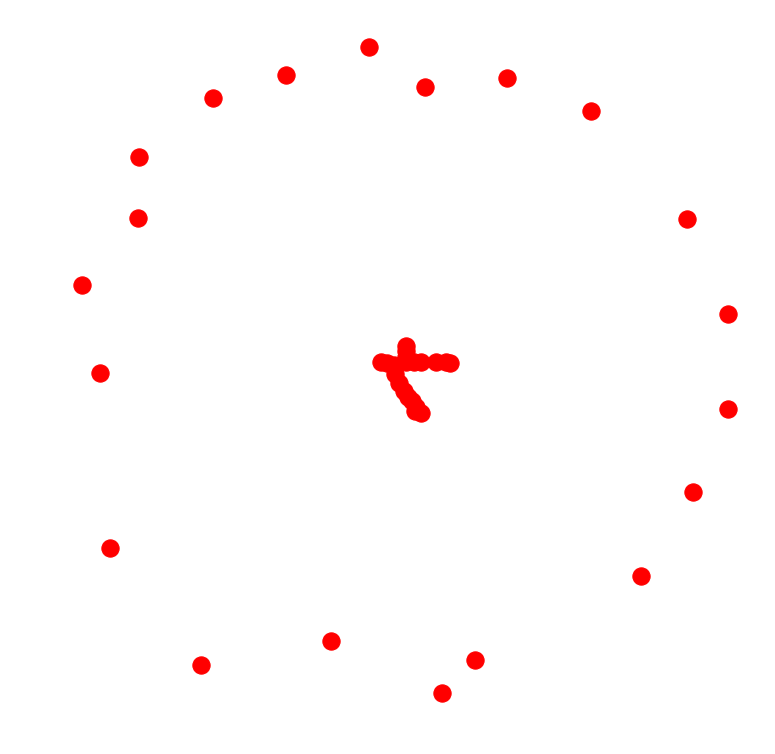

In [16]:
S = nx.Graph()
nx.GraphMLReader()
for i in range(npoints):
    #S.add_node(i, weight=ps[i], UTM=('13S', 382871, 3972649))
    for j in range(npoints):
        S.add_edge(i,j,weight=l1dist(xs,zs)[i][j])
S.add_nodes_from(ps)
TS = nx.minimum_spanning_tree(S)
plt.figure(figsize=(10,10))
nx.draw(TS)

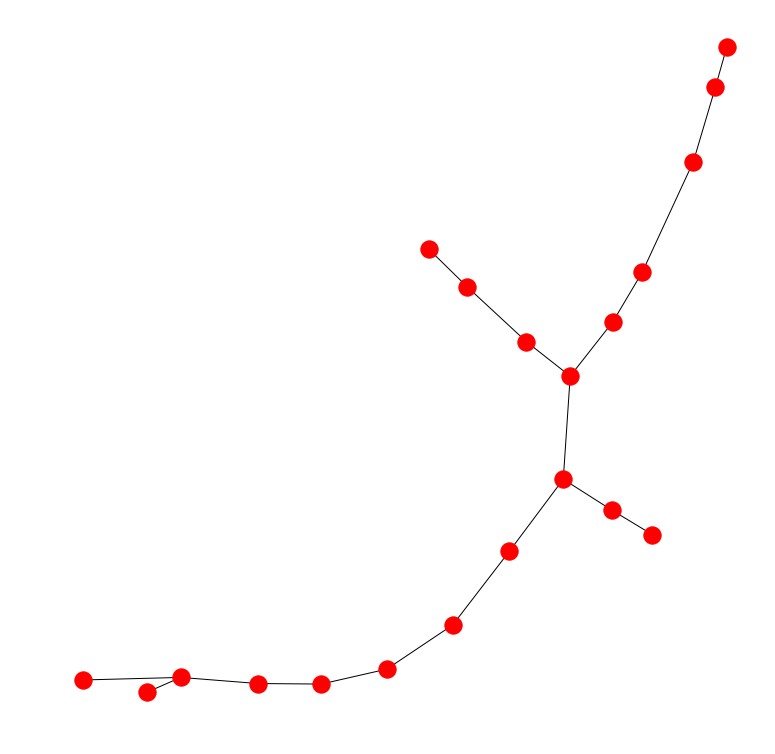

In [18]:
#Drawing the MST of a complete graph, were the edges weight is given by the distance (L1) of the nodes
G = nx.complete_graph(npoints)
for i in range(npoints):
    #G.add_node(ps[i])
    for j in range(npoints):
        G.add_edge(i,j,weight=l1dist(xs,zs)[i][j])
TG = nx.minimum_spanning_tree(G)
plt.figure(figsize=(10,10))
nx.draw(TG)

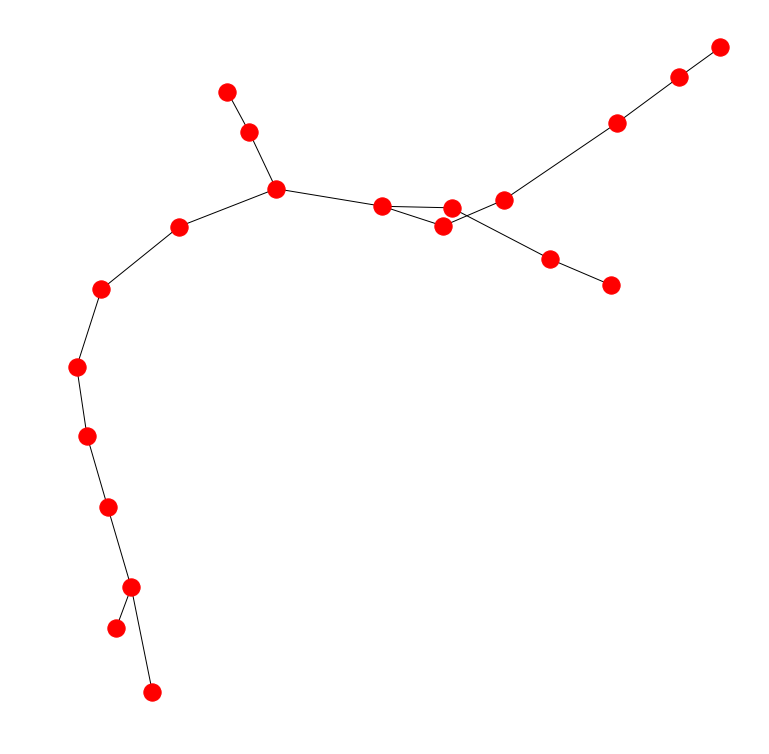

In [19]:
#Drawing the MST of a complete graph, were the edges weight is given by the distance(L2) of the nodes
K = nx.complete_graph(npoints)
for i in range(npoints):
    #G.add_node(ps[i])
    for j in range(npoints):
        K.add_edge(i,j,weight=l2dist(xs,zs)[i][j])
TK = nx.minimum_spanning_tree(K)
plt.figure(figsize=(10,10))
nx.draw(TK)